In [4]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd

# import library preprocessing
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# model selection
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import svm



In [7]:
dv = pd.read_csv('../data/voice.csv')

dv.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


1. Buatlah model klasifikasi dengan menggunakan SVM untuk data suara, voice.csv.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10672\2009916167.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dv.corr(), annot=True, linewidths=0.5,cmap='viridis')


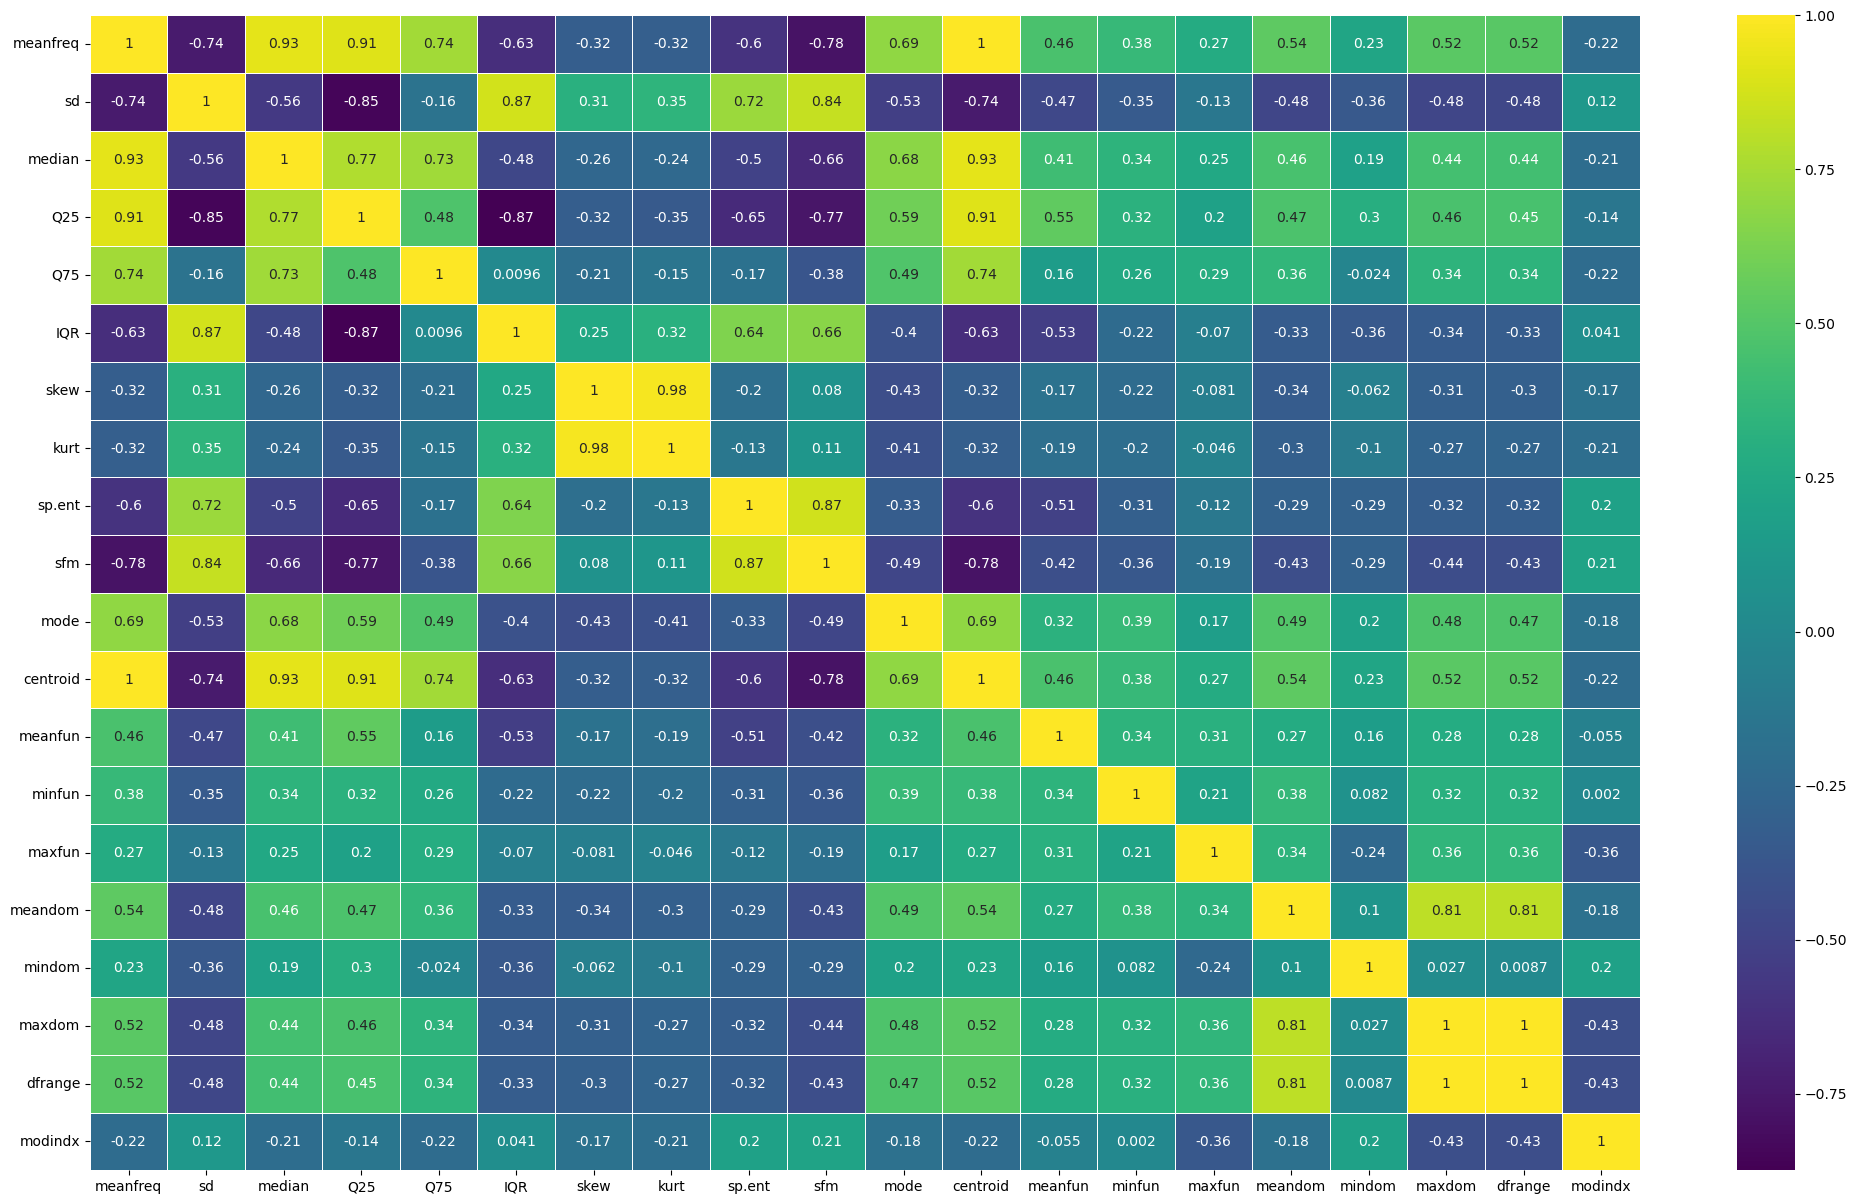

In [8]:
#visualiasi heatmap data
f,ax = plt.subplots(figsize=(25, 15))
sns.heatmap(dv.corr(), annot=True, linewidths=0.5,cmap='viridis')
plt.show()

In [9]:
# Memisahkan fitur dan label
X = dv.drop('label', axis=1)  # Fitur
y = dv['label']              # Label

# Membagi Data menjadi Data Latih dan Data Uji:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menskalakan Fitur-fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Inisialisasi Model SVM
svm_classifier = SVC(kernel='linear', C=1)

# Latih Model SVM
svm_classifier.fit(X_train, y_train)

# Evaluasi Model
y_pred = svm_classifier.predict(X_test)

# Akurasi
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

Akurasi: 0.9763406940063092


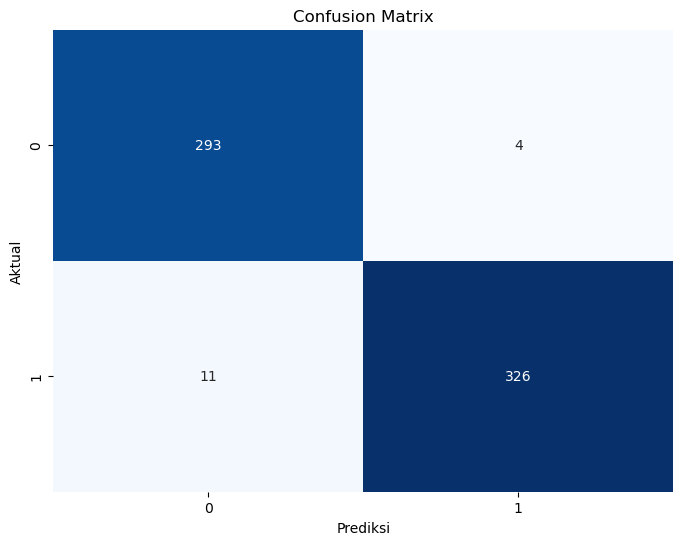

              precision    recall  f1-score   support

      female       0.96      0.99      0.98       297
        male       0.99      0.97      0.98       337

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



In [11]:
# Confusion Matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

# Report Klasifikasi
print(metrics.classification_report(y_test, y_pred))

2. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
a. Menggunakan data spam.csv
b. Fitur CountVectorizer dengan mengaktifkan stop_words
c. Evaluasi hasilnya

In [17]:
df = pd.read_csv('../data/spam.csv', encoding='latin-1') # spesifiksi encoding diperlukan karena data tidak menggunakan UTF-8

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [18]:
# Membuang kolom atau data yang tidak digunakan
df = df.drop(df.iloc[:,2:], axis=1)
df.head()


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
# Data untuk rename kolom v1 dan v2
new_cols = {
    'v1': 'Labels',
    'v2': 'SMS'
}

# Rename nama kolom v1 dan v2
df = df.rename(columns=new_cols)

# cek data
df.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
# Cek Jumlah Data Per Kelas
print(df['Labels'].value_counts())
print('\n')

# Cek Kelengkapan Data
print(df.info())
print('\n')

# Cek Statistik Deskriptif
print(df.describe())

ham     4825
spam     747
Name: Labels, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Labels  5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


       Labels                     SMS
count    5572                    5572
unique      2                    5169
top       ham  Sorry, I'll call later
freq     4825                      30


In [21]:
# Data untuk label
new_labels = {
    'spam': 1,
    'ham': 0
}

# Encode label
df['Labels'] = df['Labels'].map(new_labels)

# Cek data
df.head()

,Labels,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
X = df['SMS'].values
y = df['Labels'].values

In [23]:
#Fitur CountVectorizer dengan mengaktifkan stop_words
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Split data training dan testing menjadi 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

# Inisiasi CountVectorizer
bow = CountVectorizer(stop_words='english')

# Fitting dan transform X_train dengan CountVectorizer
X_train = bow.fit_transform(X_train)

# Transform X_test
X_test = bow.transform(X_test)

In [24]:
#Evaluasi Hasil
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Inisiasi MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = mnb.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data test
y_pred_test = mnb.predict(X_test)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train * 100:2f}%')
print(f'Hasil akurasi data test: {acc_test * 100:2f}%')

Hasil akurasi data train: 99.358974%
Hasil akurasi data test: 98.325359%


3. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
a. Menggunakan data spam.csv
b. Fitur TF-IDF dengan mengaktifkan stop_words
c. Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 2.
d. Berikan kesimpulan fitur mana yang terbaik pada kasus data spam.csv

In [27]:
#Menggunakan data spam.csv
X = df['SMS'].values
y = df['Labels'].values

In [28]:
#Fitur TF-IDF dengan mengaktifkan stop_words
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Split data training dan testing menjadi 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

# Inisiasi CountVectorizer
tfidf = TfidfVectorizer(stop_words='english')

# Fitting dan transform X_train dengan TF-IDF
X_train = tfidf.fit_transform(X_train)

# Transform X_test
X_test = tfidf.transform(X_test)

In [29]:
#Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 2.
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Inisiasi MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = mnb.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data test
y_pred_test = mnb.predict(X_test)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train * 100:f}%')
print(f'Hasil akurasi data test: {acc_test * 100:f}%')

Hasil akurasi data train: 98.410256%
Hasil akurasi data test: 96.351675%


4.Berikan kesimpulan fitur mana yang terbaik pada kasus data spam.csv

-Dari perbandingan tersebut, dapat ditarik kesimpulan bahwa model dengan CountVectorized memiliki akurasi yang lebih tinggi dalam data training maupun testing. TF_IDF memiliki akurasi yang lebih rendah pada data test,namun memiliki generalisasi yang lebih baik, meskipun akurasi data test nya lebih rendah